In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import re
df = pd.read_csv("ssh_results.csv", on_bad_lines="warn")
df.index = pd.to_datetime(df.timestamp)
df = df[df.index > "2023-11-15 12:20:00"].dropna()
df = df[(df.output != "Error reading SSH protocol banner") & (~df.output.str.startswith("Traceback (most recent call last):"))]
df

Skipping line 2290: expected 4 fields, saw 7
Skipping line 2306: expected 4 fields, saw 7
Skipping line 2312: expected 4 fields, saw 6
Skipping line 2694: expected 4 fields, saw 7
Skipping line 2700: expected 4 fields, saw 6



,IP,time,output,timestamp
timestamp,,,,
2023-11-15 12:23:15.969614,130.216.216.179,10.875,2023-11-14 23:20:02.056385: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.196,10.8820161819458,2023-11-15 12:20:02.072024: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.78,98.38002061843872,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.217.127,10.859508752822876,2023-11-15 12:20:01.951243: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.117,10.981562852859495,2023-11-15 12:20:02.191002: I tensorflow/core/...,2023-11-15 12:23:15.969614
...,...,...,...,...
2023-11-17 10:25:06.391391,130.216.216.179,10.870908498764038,2023-11-16 21:20:02.376583: I tensorflow/core/...,2023-11-17 10:25:06.391391
2023-11-17 10:25:06.391391,130.216.216.196,10.71315622329712,2023-11-17 10:20:02.237492: I tensorflow/core/...,2023-11-17 10:25:06.391391
2023-11-17 10:25:06.391391,130.216.216.78,98.4543206691742,2023-11-16 21:20:02.368471: I tensorflow/core/...,2023-11-17 10:25:06.391391


In [2]:
# Extract some metrics from the output
def parse_time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split('m'))
    return minutes * 60 + seconds
df["nvidia-smi_time"] = df.output.str.extract(r'real\s+(.+)s')[0].apply(parse_time_to_seconds)
df["tf_devices_time"] = df.output.str.extract(r'Took (\d+)s').astype(int)
df["serials"] = df.output.str.findall(r'Serial Number\s*:\s*([^:]+)\n').apply(lambda s: ", ".join(s))
df["product names"] = df.output.str.findall("^    Product Name\s*:\s*([^:]+)$", re.MULTILINE).apply(lambda s: ", ".join(s))
df["bitshift"] = (df["product names"] == "Unknown Error")
df["persistence"] = df.output.str.extract(r'Persistence Mode\s*:\s*(.+)\n')
df["tf_detected_GPUs"] = df.output.str.findall(r"physical_device:(GPU:\d)', device_type='GPU'").str.len()
df

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-15 12:23:15.969614,130.216.216.179,10.875,2023-11-14 23:20:02.056385: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.119,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-15 12:23:15.969614,130.216.216.196,10.8820161819458,2023-11-15 12:20:02.072024: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.120,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-15 12:23:15.969614,130.216.216.78,98.38002061843872,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614,87.588,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-15 12:23:15.969614,130.216.217.127,10.859508752822876,2023-11-15 12:20:01.951243: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.213,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
2023-11-15 12:23:15.969614,130.216.216.117,10.981562852859495,2023-11-15 12:20:02.191002: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.274,0,"1323022014403, 1323022014449","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 10:25:06.391391,130.216.216.179,10.870908498764038,2023-11-16 21:20:02.376583: I tensorflow/core/...,2023-11-17 10:25:06.391391,0.119,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-17 10:25:06.391391,130.216.216.196,10.71315622329712,2023-11-17 10:20:02.237492: I tensorflow/core/...,2023-11-17 10:25:06.391391,0.100,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-17 10:25:06.391391,130.216.216.78,98.4543206691742,2023-11-16 21:20:02.368471: I tensorflow/core/...,2023-11-17 10:25:06.391391,87.553,96,1322822261453,Unknown Error,True,Enabled,0


In [3]:
df[df.serials == "1322822261453"]

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-15 12:23:15.969614,130.216.216.78,98.38002061843872,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614,87.588,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-15 12:28:15.826631,130.216.216.78,98.332177400589,2023-11-14 23:25:02.018019: I tensorflow/core/...,2023-11-15 12:28:15.826631,87.500,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-15 12:33:16.936067,130.216.216.78,98.26367259025574,2023-11-14 23:30:02.786933: I tensorflow/core/...,2023-11-15 12:33:16.936067,87.500,96,1322822261453,NVIDIA A100 80GB PCIe,False,Enabled,0
2023-11-15 12:38:16.938510,130.216.216.78,98.2884006500244,2023-11-14 23:35:02.903870: I tensorflow/core/...,2023-11-15 12:38:16.938510,87.516,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-15 12:43:16.183741,130.216.216.78,98.10204219818117,2023-11-14 23:40:02.154929: I tensorflow/core/...,2023-11-15 12:43:16.183741,87.497,90,1322822261453,Unknown Error,True,Enabled,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 09:53:18.118592,130.216.216.78,98.44625163078308,2023-11-16 20:50:02.931310: I tensorflow/core/...,2023-11-17 09:53:18.118592,87.524,96,1322822261453,NVIDIA A100 80GB PCIe,False,Enabled,0
2023-11-17 09:58:17.090085,130.216.216.78,98.44450616836548,2023-11-16 20:55:02.880709: I tensorflow/core/...,2023-11-17 09:58:17.090085,87.514,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-17 10:03:17.046274,130.216.216.78,98.52380180358888,2023-11-16 21:00:02.866851: I tensorflow/core/...,2023-11-17 10:03:17.046274,87.584,96,1322822261453,Unknown Error,True,Enabled,0


In [4]:
df[df.serials == "1322822261453"].bitshift.value_counts()

True     189
False    187
Name: bitshift, dtype: int64

serials
1322122007252                   Axes(0.125,0.2;0.775x0.68)
1322822261453                   Axes(0.125,0.2;0.775x0.68)
1323022014403, 1323022014449    Axes(0.125,0.2;0.775x0.68)
1323022015019                   Axes(0.125,0.2;0.775x0.68)
1652422032676                   Axes(0.125,0.2;0.775x0.68)
1652422032681, 1322122007042    Axes(0.125,0.2;0.775x0.68)
Name: nvidia-smi_time, dtype: object

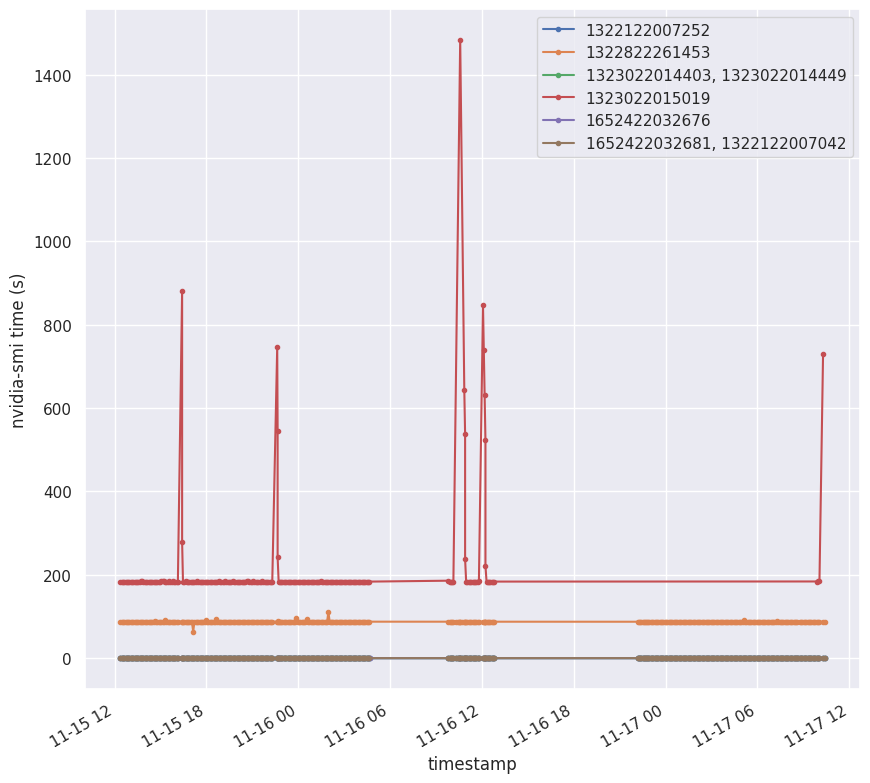

In [5]:
df.groupby("serials")["nvidia-smi_time"].plot(legend=True, figsize=(10,10), style=".-", ylabel="nvidia-smi time (s)")

In [6]:
df.groupby("serials")["nvidia-smi_time"].describe()

,count,mean,std,min,25%,50%,75%,max
serials,,,,,,,,
1322122007252,378.0,0.119026,0.002373,0.112,0.118,0.1190,0.12000,0.135
1322822261453,376.0,87.636386,1.863304,63.976,87.512,87.5390,87.56500,111.215
"1323022014403, 1323022014449",377.0,0.273072,0.007202,0.256,0.268,0.2720,0.27700,0.313
1323022015019,230.0,212.265078,134.601694,183.744,183.811,183.8465,183.93225,1483.282
1652422032676,377.0,0.106072,0.009666,0.098,0.102,0.1040,0.10600,0.244
"1652422032681, 1322122007042",377.0,0.214488,0.009036,0.203,0.210,0.2120,0.21400,0.277


In [7]:
df.to_excel("results.xlsx")